# Discrete Distributions: Frequencies and Contingency Tables 

Since for discrete variables we are interested in the frequencies of outcomes, we can use the numpy *unique* or pandas *values_count* functions depending on the data type we have used for our data.

A contingency table can also be created using the *crosstab* function in pandas. To get the share of each sample instead of the counts, add the *normalize* argument to the function call.

In [62]:
import wooldridge as wool
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# example using two variables 
affairs = wool.dataWoo('affairs')    # load built-in dataset 

In [3]:
type(affairs)

pandas.core.frame.DataFrame

In [4]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        601 non-null    int64  
 1   male      601 non-null    int64  
 2   age       601 non-null    float64
 3   yrsmarr   601 non-null    float64
 4   kids      601 non-null    int64  
 5   relig     601 non-null    int64  
 6   educ      601 non-null    int64  
 7   occup     601 non-null    int64  
 8   ratemarr  601 non-null    int64  
 9   naffairs  601 non-null    int64  
 10  affair    601 non-null    int64  
 11  vryhap    601 non-null    int64  
 12  hapavg    601 non-null    int64  
 13  avgmarr   601 non-null    int64  
 14  unhap     601 non-null    int64  
 15  vryrel    601 non-null    int64  
 16  smerel    601 non-null    int64  
 17  slghtrel  601 non-null    int64  
 18  notrel    601 non-null    int64  
dtypes: float64(2), int64(17)
memory usage: 89.3 KB


<br>From this dataset, we'll only use the variables kids and ratemarr (two categorical variables).

In [10]:
# adjust encoding from 1-5 to 0-4
affairs.ratemarr = affairs.ratemarr - 1

In [11]:
affairs.ratemarr.value_counts()

4    232
3    194
2     93
1     66
0     16
Name: ratemarr, dtype: int64

In [20]:
# create a new categorical data type based on existing data (add label to record)
affairs['haskids'] = pd.Categorical.from_codes(affairs.kids, categories=['no', 'yes'])

In [23]:
# create label based on marriage rating
mlab = ['very unhappy', 'unhappy', 'average', 'happy', 'very happy']
affairs['marriage'] = pd.Categorical.from_codes(affairs.ratemarr, categories=mlab)

In [24]:
# see the newly created labels
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        601 non-null    int64   
 1   male      601 non-null    int64   
 2   age       601 non-null    float64 
 3   yrsmarr   601 non-null    float64 
 4   kids      601 non-null    int64   
 5   relig     601 non-null    int64   
 6   educ      601 non-null    int64   
 7   occup     601 non-null    int64   
 8   ratemarr  601 non-null    int64   
 9   naffairs  601 non-null    int64   
 10  affair    601 non-null    int64   
 11  vryhap    601 non-null    int64   
 12  hapavg    601 non-null    int64   
 13  avgmarr   601 non-null    int64   
 14  unhap     601 non-null    int64   
 15  vryrel    601 non-null    int64   
 16  smerel    601 non-null    int64   
 17  slghtrel  601 non-null    int64   
 18  notrel    601 non-null    int64   
 19  haskids   601 non-null    category
 20  marriage  

In [32]:
# generate frequency table with numpy 
ft_np = np.unique(affairs.marriage, return_counts=True)
unique_elem_np = ft_np[0]    # extract array containing labels
counts_np = ft_np[1]     # extract counts for each unique value
print(f'unique_elem_np: \n{unique_elem_np}\n')
print(f'counts_np: \n{counts_np}\n')

unique_elem_np: 
['average' 'happy' 'unhappy' 'very happy' 'very unhappy']

counts_np: 
[ 93 194  66 232  16]



In [33]:
# generate frequencies table with pandas
ft_pd = affairs.marriage.value_counts()
print(f'ft_pd: \n{ft_pd}\n')

ft_pd: 
very happy      232
happy           194
average          93
unhappy          66
very unhappy     16
Name: marriage, dtype: int64



<br>Personally, I think the pandas implementation is simpler and the default output looks better. 

Next, we can go ahead and generate a frequency table using groupby.

In [35]:
# generate frequency table grouped by the given argument 
ft_pd2 = affairs.marriage.groupby(affairs.haskids).value_counts()
print(f'ft_pd2: \n{ft_pd2}\n')

ft_pd2: 
no   very happy       96
     happy            40
     average          24
     unhappy           8
     very unhappy      3
yes  happy           154
     very happy      136
     average          69
     unhappy          58
     very unhappy     13
Name: marriage, dtype: int64



<br>The above is useful; however, it might be even more useful to use an actual contingency table generated using pandas.

In [44]:
ct_all_tabs = pd.crosstab(affairs.marriage, affairs.haskids, margins=3)

In [46]:
print(f'ct_all_tabs: \n{ct_all_tabs}\n')

ct_all_tabs: 
col_0          no  yes  All
marriage                   
very unhappy    3   13   16
unhappy         8   58   66
average        24   69   93
happy          40  154  194
very happy     96  136  232
All           171  430  601



In [55]:
# generate relative crosstab across rows and column 
ct_all_rel = pd.crosstab(affairs.marriage, affairs.haskids, normalize='all')

In [56]:
print(f'ct_all_rel: \n{ct_all_rel}\n')

ct_all_rel: 
col_0               no       yes
marriage                        
very unhappy  0.004992  0.021631
unhappy       0.013311  0.096506
average       0.039933  0.114809
happy         0.066556  0.256240
very happy    0.159734  0.226290



In [57]:
# share within 'marriage' (the share within each row only)
ct_row = pd.crosstab(affairs.marriage, affairs.haskids, normalize='index')
print(f'ct_row: \n{ct_row}\n')

ct_row: 
col_0               no       yes
marriage                        
very unhappy  0.187500  0.812500
unhappy       0.121212  0.878788
average       0.258065  0.741935
happy         0.206186  0.793814
very happy    0.413793  0.586207



In [61]:
# share within 'haskids' (columns)
ct_col = pd.crosstab(affairs.marriage, affairs.haskids, normalize='columns')
print(f'ct_col: \n{ct_col}\n')

ct_col: 
col_0               no       yes
marriage                        
very unhappy  0.017544  0.030233
unhappy       0.046784  0.134884
average       0.140351  0.160465
happy         0.233918  0.358140
very happy    0.561404  0.316279



<br>Now that we've create some frequency and crosstabs, let's look at this values graphically using basic pie and bar charts. 

In [72]:
# generate counts for all graphs 
counts = affairs.marriage.value_counts()
count_bykids = affairs.marriage.groupby(affairs.haskids).value_counts()
counts_yes = count_bykids.yes
counts_no = count_bykids.no

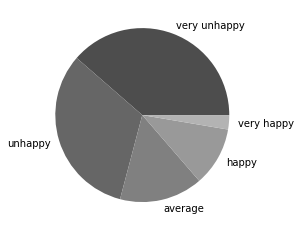

In [89]:
# generate pie chart 
grey_colors = ['.3', '.4', '.5', '.6', '.7']
counts_pie = plt.pie(counts, labels=mlab, colors=grey_colors);    # notice the semicolon supresses description output for some reason

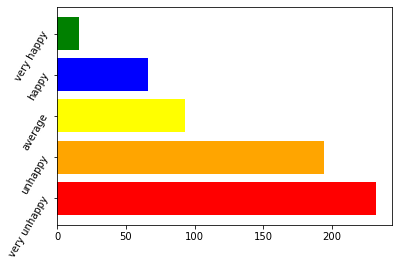

In [95]:
# generate horizontal bar chart 
y_pos = [0, 1, 2, 3, 4]    # location for the bars 
plt.barh(y_pos, counts, color=['red', 'orange', 'yellow', 'blue', 'green'])
plt.yticks(y_pos, mlab, rotation=60);

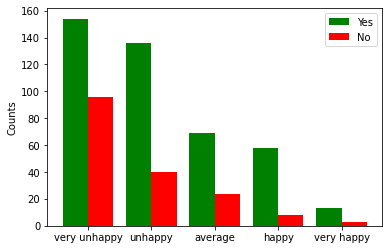

In [102]:
# generate grouped bar plot

# add left bars first 
x_pos_leftbar = [-.2, .8, 1.8, 2.8, 3.8]
plt.bar(x_pos_leftbar, counts_yes, width=.4, color='green', label='Yes')

# add right bars 
x_pos_rightbar = [0.2, 1.2, 2.2, 3.2, 4.2]
plt.bar(x_pos_rightbar, counts_no, width=.4, color='red', label='No')

plt.ylabel('Counts')
plt.xticks(x_pos, mlab)
plt.legend();